In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv("./COVID-USA.csv",index_col='Date')

In [31]:
decomposition = seasonal_decompose(np.array(df.NewCases.tolist()).conj(),period=7,model='multiplicative')
trend    = decomposition.trend#linea de tendencia
seasonal = decomposition.seasonal#termino oscilatorio
residual = decomposition.resid#Ruido

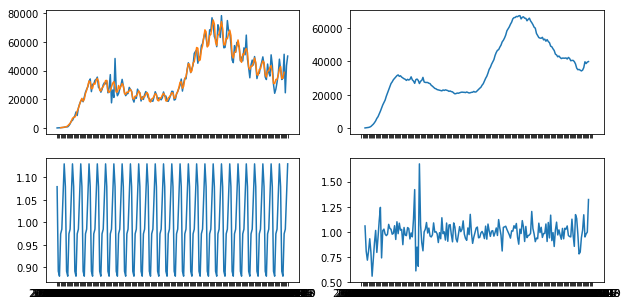

In [29]:
fig,ax=plt.subplots(2, 2, figsize=(10,5),sharex=True)
ax[0,0].plot(df)
ax[0,1].plot(trend)
ax[1,0].plot(seasonal)
ax[1,1].plot(residual)
ax[0,0].plot(trend*seasonal)

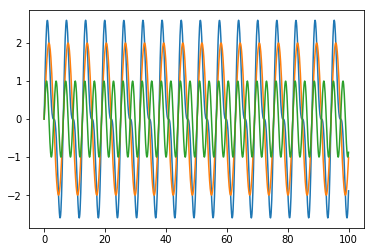

In [64]:
t=np.linspace(0,100,1000)
y1=2*np.sin(1*t)
y2=1*np.sin(2*t)
ytot=y1+y2
plt.plot(t,ytot)
plt.plot(t,y1)
plt.plot(t,y2)

In [65]:
from scipy import fftpack
y_fft = fftpack.fft(ytot)#fast fourier transform

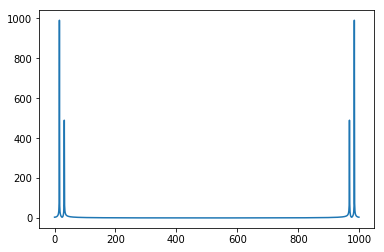

In [66]:
plt.plot(abs(y_fft))

In [55]:
data=df.NewCases/trend

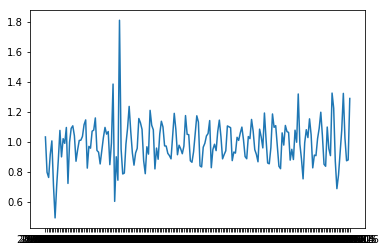

In [59]:
plt.plot(data.dropna())

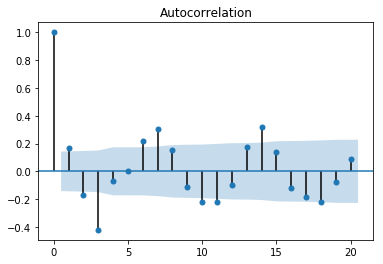

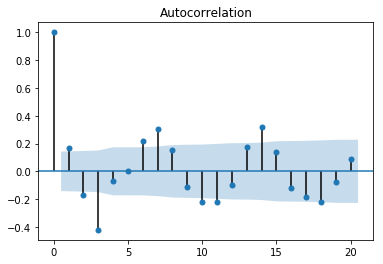

In [60]:
import statsmodels.graphics.tsaplots as sm
#ax[0,0].plot(df)
sm.plot_acf(data.dropna(),lags=20)

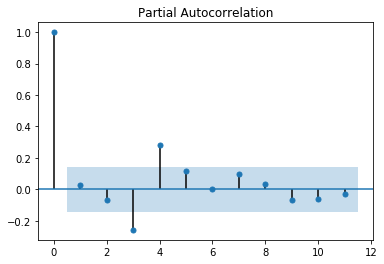

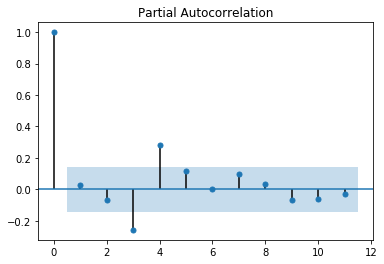

In [23]:
import statsmodels.graphics.tsaplots as sm
sm.plot_pacf(residual[~np.isnan(residual)],lags=11)

<StemContainer object of 3 artists>

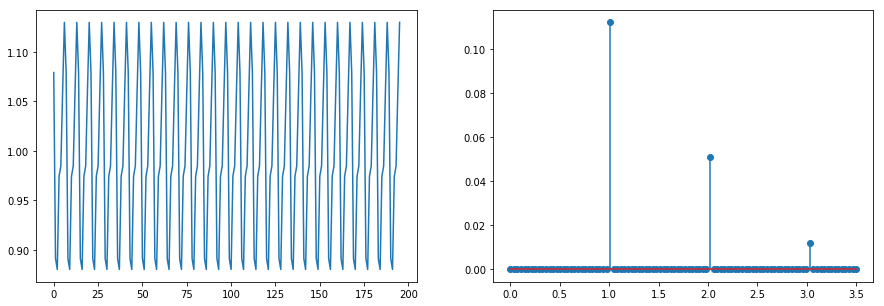

In [43]:
# Frequency and sampling rate
f = 10 # frequency
Fs = 7 # sampling rate
t = np.arange(0,1,1/Fs)
# Sine function
#y = np.sin(2 * np.pi * f * t)
# Perform Fourier transform using scipy
y=seasonal
from scipy import fftpack
y_fft = fftpack.fft(seasonal-1)
 #Plot data
n = len(seasonal)
fr = Fs/2 * np.linspace(0,1,int(n/2))
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(y)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain

<StemContainer object of 3 artists>

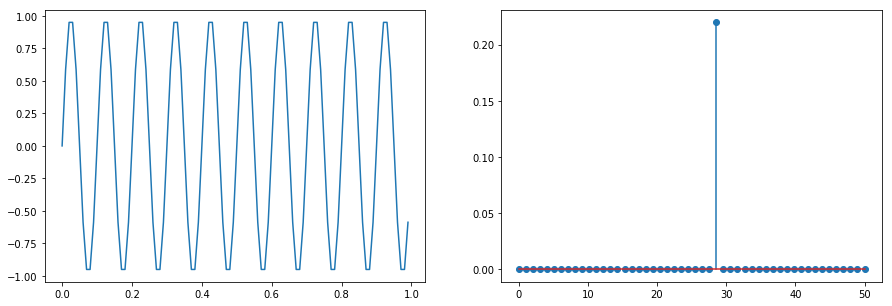

In [44]:
# Frequency and sampling rate
f = 10 # frequency
Fs = 100 # sampling rate
t = np.arange(0,1,1/Fs)
# Sine function
y = np.sin(2 * np.pi * f * t)
# Perform Fourier transform using scipy

 #Plot data
n = len(t)
fr = Fs/2 * np.linspace(0,1,int(n/2))
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(t, y)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain